In [62]:
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import hvplot.pandas

import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial

In [63]:
# Read the CSV file into a Pandas DataFrame
# Set the index using the Ticker column
path = Path() / "Data" / "tenyear.csv"
tracks_df = pd.read_csv(path ,index_col=[0])

# Review the DataFrame
tracks_df.head(3)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
7054,0.022200,['Tame Impala'],0.450,362880,0.849,0,4m3GHOgCNZMv0we7H9j8Y8,0.00455,5,0.0792,-5.075,1,Expectation,48,2010-05-21,0.0570,139.925,0.1610,2010
7055,0.000103,['Bring Me The Horizon'],0.382,274133,0.943,0,0ZxZsjMMyLgjRV1XLWlIaS,0.00011,8,0.3960,-5.434,1,It Never Ends,50,2010-10-05,0.0872,105.032,0.1280,2010
7056,0.852000,['Daft Punk'],0.179,162120,0.167,0,0Jc2SfIHv63JNsUZpunh54,0.74800,1,0.1060,-23.408,1,Solar Sailer,48,2010-01-01,0.0394,124.266,0.0399,2010


In [64]:
#new df so we don't lose the original, might need song names and ids in the same place for later
cleaned_tracks_df = tracks_df.drop(['artists','explicit', 'mode','release_date','name','year','key'], axis=1, inplace=False)
cleaned_tracks_df = cleaned_tracks_df.set_index(['id'])
cleaned_tracks_df.head(3)

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
id,,,,,,,,,,,
4m3GHOgCNZMv0we7H9j8Y8,0.022200,0.450,362880,0.849,0.00455,0.0792,-5.075,48,0.0570,139.925,0.1610
0ZxZsjMMyLgjRV1XLWlIaS,0.000103,0.382,274133,0.943,0.00011,0.3960,-5.434,50,0.0872,105.032,0.1280
0Jc2SfIHv63JNsUZpunh54,0.852000,0.179,162120,0.167,0.74800,0.1060,-23.408,48,0.0394,124.266,0.0399


In [65]:
#getting column names and indicies from old df
column_names = cleaned_tracks_df.columns
index = cleaned_tracks_df.index

#scaling data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_tracks_df)

#new df for scaled data
tracks_df_scaled = pd.DataFrame(scaled_data, columns=column_names, index=index)
tracks_df_scaled.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
id,,,,,,,,,,,
4m3GHOgCNZMv0we7H9j8Y8,-0.811238,-0.909532,1.643723,1.002060,-0.292517,-0.715717,0.488498,-1.124635,-0.430316,0.623063,-1.259246
0ZxZsjMMyLgjRV1XLWlIaS,-0.888078,-1.308428,0.605259,1.434322,-0.312908,1.364415,0.412034,-0.934832,-0.156268,-0.514938,-1.396740
0Jc2SfIHv63JNsUZpunh54,2.074284,-2.499249,-0.705451,-2.134141,3.121720,-0.539746,-3.416253,-1.124635,-0.590026,0.112360,-1.763809
5QZunYrvUrJs3Mzrjl7fKV,-0.607117,-0.575163,0.516492,0.638776,-0.313413,0.169390,0.500638,-1.124635,-0.562803,1.145539,0.078200
0X0zDB7RqpWOIwCHGr2Whu,-0.878143,-1.701457,-0.137699,1.351549,-0.018579,-0.487218,0.609476,-1.219537,0.114150,2.103086,-0.200955


In [66]:
# Create an empty list to store the inertia values
k = list(range(1,12))
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for i in k:
    k_model = KMeans(n_clusters=i, random_state=42)
    k_model.fit(tracks_df_scaled)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_dict = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_dict)
elbow_df.head()

,k,inertia
0,1,238216.000000
1,2,195581.428957
2,3,175718.956794
3,4,160350.995115
4,5,148070.791768


In [67]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow = elbow_df.hvplot.line(
    x='k',
    y='inertia',
    xticks=k,
    title='Elbow Curve using Original Scaled Data')
elbow

:Curve   [k]   (inertia)

k = 2 or 5 i guess?

In [74]:
k_model = KMeans(n_clusters=5, random_state=1)
k_model.fit(tracks_df_scaled)

predictions = k_model.fit_predict(tracks_df_scaled)
print(predictions)

[3 3 2 ... 1 0 1]


In [75]:
tracks_df_predictions = cleaned_tracks_df.copy()
tracks_df_predictions["ClusterGroup"] = predictions
tracks_df_predictions.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,ClusterGroup
id,,,,,,,,,,,,
4m3GHOgCNZMv0we7H9j8Y8,0.022200,0.450,362880,0.849,0.00455,0.0792,-5.075,48,0.0570,139.925,0.1610,3
0ZxZsjMMyLgjRV1XLWlIaS,0.000103,0.382,274133,0.943,0.00011,0.3960,-5.434,50,0.0872,105.032,0.1280,3
0Jc2SfIHv63JNsUZpunh54,0.852000,0.179,162120,0.167,0.74800,0.1060,-23.408,48,0.0394,124.266,0.0399,2
5QZunYrvUrJs3Mzrjl7fKV,0.080900,0.507,266547,0.770,0.00000,0.2140,-5.018,48,0.0424,155.945,0.4820,3
0X0zDB7RqpWOIwCHGr2Whu,0.002960,0.315,210640,0.925,0.06420,0.1140,-4.507,47,0.1170,185.305,0.4150,3


In [76]:
track_clusters = tracks_df_predictions.hvplot.scatter(
    x="danceability",
    y="energy",
    by="ClusterGroup",
    hover_cols = "id",
    title="KMeans Cluster Groups"
)

track_clusters

:NdOverlay   [ClusterGroup]
   :Scatter   [danceability]   (energy,id)

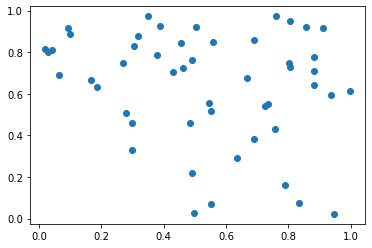

In [71]:
#testing out the cKDTree --> we can use this to determine the closest points on a graph
points = np.column_stack([np.random.rand(50), np.random.rand(50)])
fig, ax = plt.subplots()
coll = ax.scatter(points[:,0], points[:,1])
ckdtree = scipy.spatial.cKDTree(points)

In [72]:
def closest_point_distance(ckdtree, x, y):
    #returns distance to closest point
    return ckdtree.query([x, y])[0]

#i think we can use this function: returns the IDs of the closest data points on the graph
def closest_point_id(ckdtree, x, y):
    #returns index of closest point
    return ckdtree.query([x, y],k=5)[1]

def closest_point_coords(ckdtree, x, y):
    # returns coordinates of closest point
    return ckdtree.data[closest_point_id(ckdtree, x, y)]
    # ckdtree.data is the same as points

In [73]:
closest_point_id(ckdtree, 0.7, 0.5)

array([22, 38, 21, 29, 24], dtype=int64)